In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from scipy.stats import probplot

In [6]:
from sklearn.preprocessing import PowerTransformer

In [60]:
df = pd.read_csv('synthetic.csv')

In [61]:
df.sample(5)

,Category,Price,Rating,Stock,Discount
1487,NaN,387.0,3.634322,NaN,17.0
1837,B,8440.0,4.233514,NaN,4.0
114,D,6117.0,4.858686,NaN,4.0
4310,C,6836.0,2.914606,In Stock,17.0
3386,NaN,165.0,2.379961,Out of Stock,NaN


In [62]:
df.shape

(4362, 5)

In [63]:
(df.isnull().sum())*(len(df)**(-1))*100

Category    62.998624
Price        3.988996
Rating      46.996790
Stock       30.994956
Discount     8.986703
dtype: float64

In [64]:
from sklearn.impute import SimpleImputer

In [65]:
trf1 = SimpleImputer(strategy = 'most_frequent')
trf2 = SimpleImputer(strategy = 'mean')

In [66]:
cat_col = ['Category', 'Stock']
num_col = ['Price', 'Rating','Discount']

In [67]:
trf1.fit_transform(df[cat_col])

array([['C', 'In Stock'],
       ['C', 'In Stock'],
       ['C', 'In Stock'],
       ...,
       ['C', 'Out of Stock'],
       ['D', 'In Stock'],
       ['C', 'In Stock']], shape=(4362, 2), dtype=object)

In [68]:
trf2.fit_transform(df[num_col])

array([[5.54800000e+03, 1.87032202e+00, 0.00000000e+00],
       [3.04500000e+03, 4.75779806e+00, 3.80000000e+01],
       [4.00400000e+03, 3.03829252e+00, 0.00000000e+00],
       ...,
       [3.28300000e+03, 3.03829252e+00, 9.00000000e+00],
       [2.99900000e+03, 4.42599525e+00, 4.00000000e+01],
       [5.01697063e+03, 2.18447132e+00, 0.00000000e+00]], shape=(4362, 3))

<Axes: xlabel='Rating', ylabel='Count'>

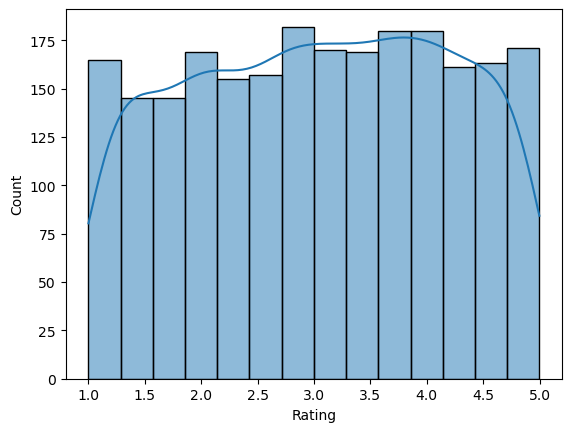

In [69]:
sns.histplot(df['Rating'], kde = True)

In [70]:
trf_po = PowerTransformer(method = 'yeo-johnson', standardize = True)

In [76]:
newdf = trf_po.fit_transform(df[['Price', 'Rating']])
trf_po.lambdas_

array([0.72219207, 0.87346403])

In [72]:
newdf = pd.DataFrame(newdf, columns = ['Price', 'Rating'])

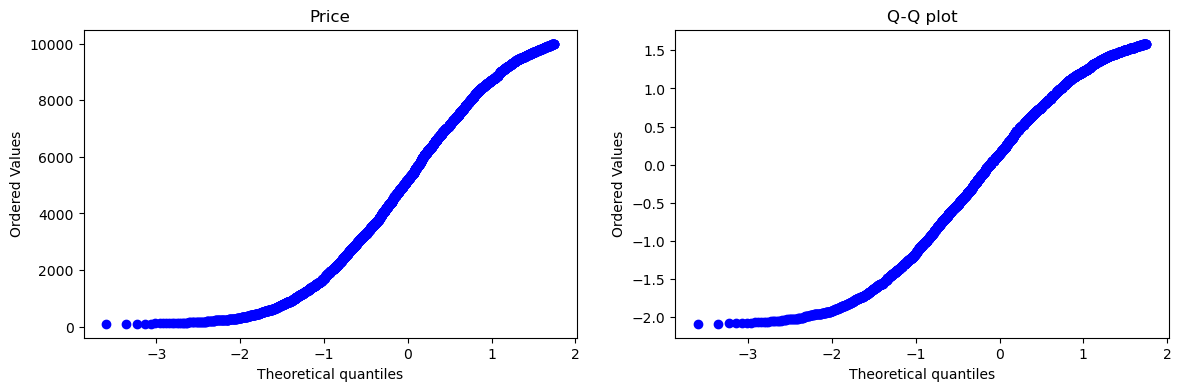

In [73]:
plt.figure(figsize = (14,4))
plt.subplot(1,2,1)
probplot(df['Price'], dist = 'norm', plot = plt)
plt.title('Price')

plt.subplot(1,2,2)
probplot(newdf['Price'], dist = 'norm', plot = plt)
plt.title('Q-Q plot')

plt.show()

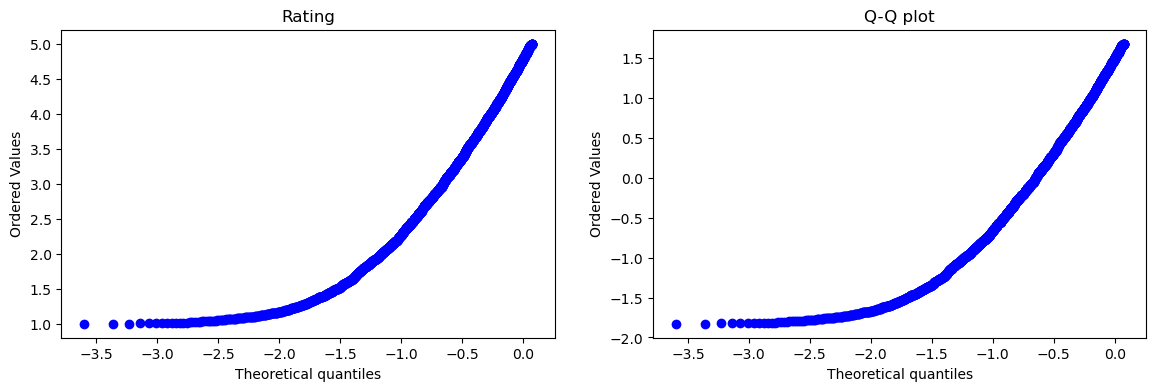

In [75]:
plt.figure(figsize = (14,4))
plt.subplot(1,2,1)
probplot(df['Rating'], dist = 'norm', plot = plt)
plt.title('Rating')

plt.subplot(1,2,2)
probplot(newdf['Rating'], dist = 'norm', plot = plt)
plt.title('Q-Q plot')

plt.show()